# Create animals list

In [31]:
import os, re

animals = []

file_path = os.path.join('..', 'Dataset', 'artefact1', 'classes.txt')
if os.path.exists(file_path):
    data = open(file_path, "r")
    for i in data:
        if len(re.findall("[a-zA-Z]+", i)) > 1:
            animals.extend(re.findall("[a-zA-Z]+", i))
            animals.append(re.findall("[a-zA-Z]+", i)[0] + ' ' + re.findall("[a-zA-Z]+", i)[1])
            animals.append(re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1])
        else:
            animals.append(re.findall("[a-zA-Z]+", i)[0])
            
more_animals = ['african_buffalo', 'alligator', 'amphibian', 'amur_leopard', 'ants', 'bear', 
                'blue_whale', 'bobcat', 'bull', 'cat', 'chimp', 'chimpanzee', 'cow', 'dog', 
                'dolphin', 'water_buffalo', 'elephant', 'frog', 'giant', 'giant_panda', 
                'goat', 'gorilla', 'horse', 'killer_whale', 'lion', 'lizard', 'monkey', 
                'mouse', 'orangutan', 'ox', 'panda', 'polar_bear', 'rabbit', 'rat', 'rhino', 
                'rhinoceros', 'seal', 'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 
                'tiger', 'turtle', 'walrus', 'whale']
for i in more_animals:
    if len(re.findall("[a-zA-Z]+", i)) > 1:
        if re.findall("[a-zA-Z]+", i)[0] not in animals:
            animals.append(re.findall("[a-zA-Z]+", i)[0])
            if re.findall("[a-zA-Z]+", i)[1] not in animals:
                animals.append(re.findall("[a-zA-Z]+", i)[1])
                if re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1] not in animals:
                    animals.append(re.findall("[a-zA-Z]+", i)[0] + ' ' + re.findall("[a-zA-Z]+", i)[1])
                    animals.append(re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1])
    else:
        if re.findall("[a-zA-Z]+", i)[0] not in animals:
            animals.append(re.findall("[a-zA-Z]+", i)[0])

file_path = os.path.join('..', 'Dataset', 'artefact1', 'animals.txt')
f = open(file_path, "a")
for i in animals:
    f.write(i)
    f.write('\n')
f.close()

# Autoencoder

In [36]:
import numpy as np
import urllib.request
from gensim.utils import simple_preprocess

# Download GloVe embeddings
# glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
# urllib.request.urlretrieve(glove_url, "glove.6B.zip")

# import zipfile
# with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
#     zip_ref.extractall("glove.6B")

In [44]:
# Example custom dataset
# custom_sentences = [
#     'african_buffalo', 'alligator', 'amphibian', 'amur_leopard', 
#     'ants', 'bear', 'bird', 'blue_whale', 'bobcat', 'cat', 'chimp', 
#     'chimpanzee', 'cow', 'dog', 'dolphin', 'domestic_water_buffalo', 
#     'eagle', 'elephant', 'fish', 'frog', 'giant', 'giant_panda', 'goat', 
#     'gorilla', 'hen', 'horse', 'killer_whale', 'lion', 'lizard', 'monkey', 
#     'mouse', 'orangutan', 'ostrich', 'ox', 'panda', 'polar_bear', 'rabbit', 
#     'rat', 'rhino', 'rhinoceros', 'rhinoceroses', 'seal', 'sealskin', 
#     'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 'tiger', 'turtle', 
#     'walrus', 'whale', 'bird', 'fish', 'lion', 'tiger', 'bull'
# ]
animals_list_file_path = os.path.join('..', 'Dataset', 'artefact1', 'animals.txt')
with open(animals_list_file_path, "r") as f:
    custom_sentences = [line[:-1] for line in f]

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings("glove.6B/glove.6B.300d.txt")  # Using 50d GloVe embeddings
print(f"embeddings_index : {type(embeddings_index)} \n")

# Convert sentences to embeddings
def sentence_to_embedding(sentence, embeddings_index):
    words = simple_preprocess(sentence)
    valid_words = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(300) # Using 50d GloVe embeddings

sentence_embeddings = np.array([sentence_to_embedding(sentence, embeddings_index) for sentence in custom_sentences])
print(f"sentence_embeddings : {type(sentence_embeddings)} \n")

embeddings_index : <class 'dict'> 

sentence_embeddings : <class 'numpy.ndarray'> 



In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the size of the input and latent space
input_dim = 300 # 50  # Dimension of GloVe embeddings
latent_dim = 16  # Dimension of latent space

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(latent_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')


In [48]:
autoencoder.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 300)               9900      
                                                                 
Total params: 20604 (80.48 KB)
Trainable params: 20604 (80.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Train the autoencoder
autoencoder.fit(sentence_embeddings, sentence_embeddings, epochs=50, batch_size=5, shuffle=True, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0687 - val_loss: 0.1275
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0684 - val_loss: 0.1272
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0683 - val_loss: 0.1273
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0683 - val_loss: 0.1273
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0682 - val_loss: 0.1273
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0682 - val_loss: 0.1273
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.1272
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0682 - val_loss: 0.1273
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.1273
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.1273
Epoch 11/50
16/16 [

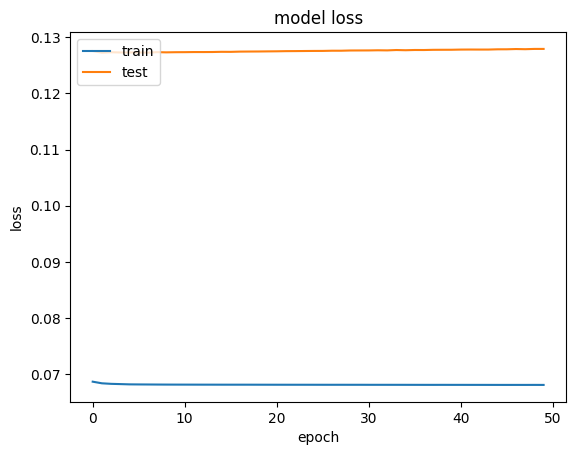

In [66]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
# Encode sentences to get their latent representations
sentence_latents = encoder.predict(sentence_embeddings)
# print(f"sentence_latents : {sentence_latents}")

# Create a dictionary to map sentences to their latent representations
sentence_to_latent = {i: sentence_latents[i] for i in range(len(custom_sentences))}
# print(f"sentence_to_latent : {sentence_to_latent}")

3/3 [==============================] - 0s 4ms/step


In [68]:
sentence_to_latent[12], custom_sentences[12]

(array([8.0372    , 4.5084567 , 4.340227  , 0.        , 0.34305197,
        5.381548  , 3.1030684 , 5.6626935 , 2.590073  , 0.        ,
        0.        , 3.3931522 , 2.9133062 , 0.        , 0.        ,
        0.        ], dtype=float32),
 'cat')

In [69]:
custom_sentences

['antelope',
 'grizzly',
 'bear',
 'grizzly bear',
 'grizzly_bear',
 'killer',
 'whale',
 'killer whale',
 'killer_whale',
 'beaver',
 'dalmatian',
 'persian',
 'cat',
 'persian cat',
 'persian_cat',
 'horse',
 'german',
 'shepherd',
 'german shepherd',
 'german_shepherd',
 'blue',
 'whale',
 'blue whale',
 'blue_whale',
 'siamese',
 'cat',
 'siamese cat',
 'siamese_cat',
 'skunk',
 'mole',
 'tiger',
 'hippopotamus',
 'leopard',
 'moose',
 'spider',
 'monkey',
 'spider monkey',
 'spider_monkey',
 'humpback',
 'whale',
 'humpback whale',
 'humpback_whale',
 'elephant',
 'gorilla',
 'ox',
 'fox',
 'sheep',
 'seal',
 'chimpanzee',
 'hamster',
 'squirrel',
 'rhinoceros',
 'rabbit',
 'bat',
 'giraffe',
 'wolf',
 'chihuahua',
 'rat',
 'weasel',
 'otter',
 'buffalo',
 'zebra',
 'giant',
 'panda',
 'giant panda',
 'giant_panda',
 'deer',
 'bobcat',
 'pig',
 'lion',
 'mouse',
 'polar',
 'bear',
 'polar bear',
 'polar_bear',
 'collie',
 'walrus',
 'raccoon',
 'cow',
 'dolphin',
 'african',
 'all

In [70]:
from scipy.spatial.distance import cosine

def find_similar_sentences(target_sentence_index, sentence_to_latent, top_n=10):
    target_latent = sentence_to_latent[target_sentence_index]
    similarities = []
    for index, latent in sentence_to_latent.items():
        if index != target_sentence_index:
            similarity = 1 - cosine(target_latent, latent)
            similarities.append((index, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Find sentences similar to the first sentence
similar_sentences = find_similar_sentences(8, sentence_to_latent)
print("Most similar sentences to the first sentence:")
for index, score in similar_sentences:
    print(f"Sentence: {custom_sentences[index]} - Similarity: {score}")


Most similar sentences to the first sentence:
Sentence: grizzly_bear - Similarity: 1
Sentence: persian_cat - Similarity: 1
Sentence: german_shepherd - Similarity: 1
Sentence: blue_whale - Similarity: 1
Sentence: siamese_cat - Similarity: 1
Sentence: spider_monkey - Similarity: 1
Sentence: humpback_whale - Similarity: 1
Sentence: giant_panda - Similarity: 1
Sentence: polar_bear - Similarity: 1
Sentence: water - Similarity: 0.9901264309883118
